In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
df = pd.read_csv('GlobalLandTemperaturesByState.csv')

In [3]:
df = df[['dt', 'AverageTemperature', 'State']]
df['dt'] = pd.to_datetime(df['dt'])
df = df[df['dt'].dt.year > 2000]
states_filtered = ['Wyoming', 'Nebraska', 'South Dakota']
df_filtered = df[df['State'].isin(states_filtered)]
df_avg_temp_by_date = df_filtered.groupby('dt')['AverageTemperature'].mean().reset_index()
df_avg_temp_by_date.columns = ['Date', 'AverageTemperature']

df_avg_temp_by_date['DateNumeric'] = (
    df_avg_temp_by_date['Date'] - df_avg_temp_by_date['Date'].min()
).dt.total_seconds() / (60 * 60 * 24)
def model(x, a, b, c, d):
    return a * np.cos(b * x + c) + d
x_data = df_avg_temp_by_date['DateNumeric'].values
y_data = df_avg_temp_by_date['AverageTemperature'].values
initial_guess = [10, 2 * np.pi / 365, 0, 10]
params, covariance = curve_fit(model, x_data, y_data, p0=initial_guess)
df_avg_temp_by_date['FittedTemperature'] = model(x_data, *params)

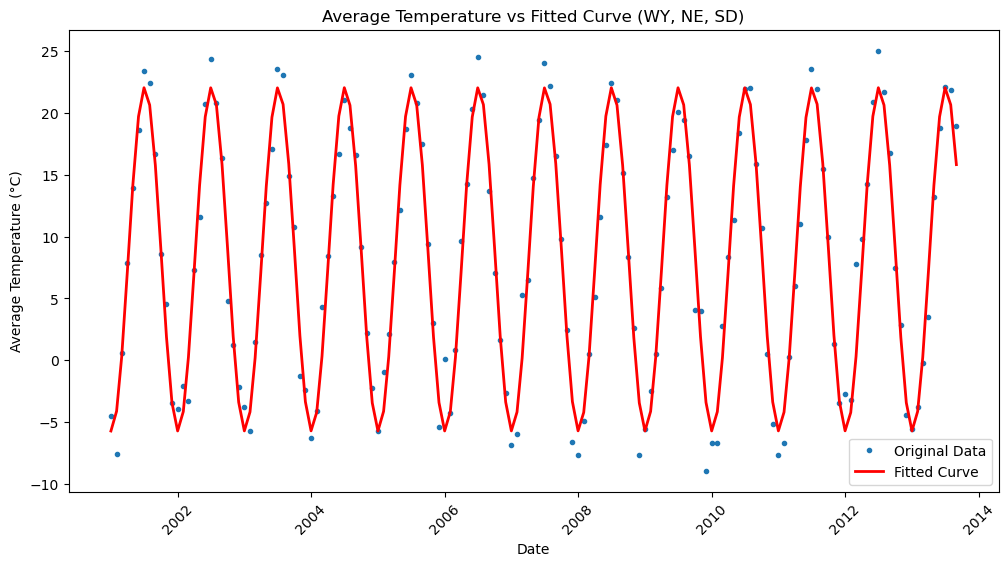

In [5]:
plt.figure(figsize=(12, 6))

plt.plot(df_avg_temp_by_date['Date'], 
         df_avg_temp_by_date['AverageTemperature'],
         label='Original Data', 
         marker='o', linestyle='', markersize=3)

plt.plot(df_avg_temp_by_date['Date'], 
         df_avg_temp_by_date['FittedTemperature'],
         label='Fitted Curve', 
         color='red', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature vs Fitted Curve (WY, NE, SD)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [7]:
# 1.8
parameter_errors = np.sqrt(np.diag(covariance))

parameter_names = ['Amplitude (a)', 'Frequency (b)', 'Phase Shift (c)', 'Vertical Shift (d)']

fitted_parameters = list(zip(parameter_names, params, parameter_errors))

for name, value, error in fitted_parameters:
    print(f"{name}: {value:.6f} ± {error:.6f}")

Amplitude (a): -13.898336 ± 0.226500
Frequency (b): 0.017202 ± 0.000012
Phase Shift (c): -0.046495 ± 0.032815
Vertical Shift (d): 8.174924 ± 0.160698


In [9]:
# 1.9
print("Fitted Parameters with Errors:")
for name, value, error in zip(parameter_names, params, parameter_errors):
    print(f"{name}: {value:.4f} ± {error:.4f}")

a, b, c, d = params
equation_str = f"y = {a:.4f} * cos({b:.6f} * x + {c:.4f}) + {d:.4f}"
print("\nFinal fitted equation:")
print(equation_str)

Fitted Parameters with Errors:
Amplitude (a): -13.8983 ± 0.2265
Frequency (b): 0.0172 ± 0.0000
Phase Shift (c): -0.0465 ± 0.0328
Vertical Shift (d): 8.1749 ± 0.1607

Final fitted equation:
y = -13.8983 * cos(0.017202 * x + -0.0465) + 8.1749
